After cleaning data now we can analyze cleaned data. First we import pandas and matplotlib then read data_cleaned.csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_cleaned.csv', parse_dates =['date'])

Question 1: What is our average hourly electricity usage?

In [2]:
hourly_ect_usage = df['kwh'].mean()
round(hourly_ect_usage, 3)

0.782

Question 2: What is our electricity usage per month? (for ordering months properly we'll reindex it)

In [3]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
          'September', 'October', 'November', 'December']
monthly_usage = df.groupby(df['date'].dt.strftime('%B'))['kwh'].sum().reindex(months)
print(monthly_usage)

date
January      1042.660
February      559.719
March         420.748
April         151.242
May           417.157
June          904.247
July         1255.524
August        633.390
September     349.686
October       313.719
November      232.420
December      568.739
Name: kwh, dtype: float64


If we plotting this data, we'll see differences more clear between months

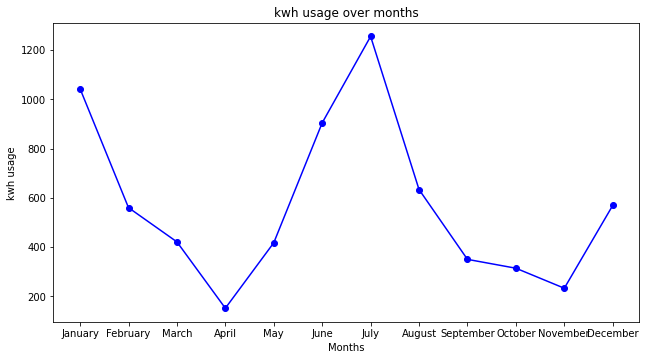

In [4]:
fig, ax = plt.subplots()
ax_month = ax.plot(monthly_usage.index, monthly_usage, '-bo')
ax.set_xlabel('Months')
ax.set_ylabel('kwh usage')
ax.set_title('kwh usage over months')
fig.set_size_inches(10.5, 5.5)
plt.show()

Question 3: What is our electricity usage per weekdays?

In [5]:
weekdays =[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_usage = df.groupby(df['date'].dt.strftime('%A'))['kwh'].sum().reindex(weekdays)
print(weekday_usage)

date
Monday        905.979
Tuesday       906.120
Wednesday     933.575
Thursday      930.331
Friday        940.673
Saturday     1111.673
Sunday       1120.900
Name: kwh, dtype: float64


If we plotting this data, we'll see almost every day usage equal except weekend (weekend usage more than others)




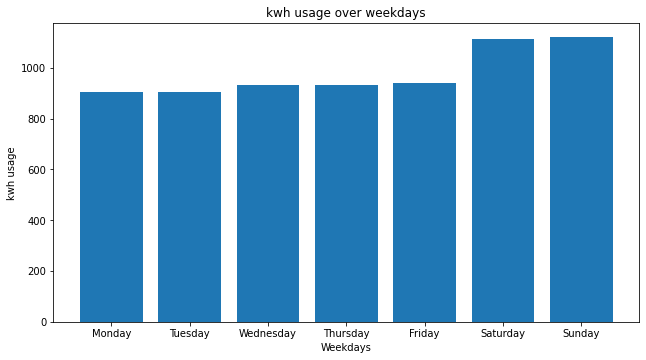

In [6]:
fig, ax = plt.subplots()
ax_weekday = ax.bar(weekday_usage.index, weekday_usage)
ax.set_xlabel('Weekdays')
ax.set_ylabel('kwh usage')
ax.set_title('kwh usage over weekdays')
fig.set_size_inches(10.5, 5.5)
plt.show()

Question 4: What is the highest amount of electricity used in a continuous 4 hour period?

In [7]:
hourly_period = df.resample('4H', on='date').kwh.sum()
hourly_period[hourly_period == hourly_period.max()]

date
2014-07-20 16:00:00    14.386
Freq: 4H, Name: kwh, dtype: float64